## Preprocessing


In [1]:
import wget
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
df = pd.read_feather('../data/raw_data/GRB080903.fth')

### Padding

In [4]:
df.head(25)

,center,15_25_keV,25_50_keV,50_100_keV,100_350_keV,15_350_keV
0,-10.536,-0.016749,0.040253,0.012057,-0.003267,0.032294
1,-10.472,0.023083,0.001653,0.008478,0.006373,0.039586
2,-10.408,0.013101,0.030002,0.021580,-0.013944,0.050738
3,-10.344,0.001536,0.011091,-0.014225,0.023651,0.022053
4,-10.280,0.013981,0.013753,0.021683,0.017974,0.067391
5,-10.216,-0.036785,-0.006834,0.022506,0.007548,-0.013565
6,-10.152,0.002729,0.029097,0.002056,0.001153,0.035034
7,-10.088,-0.016846,0.000969,0.013528,0.012384,0.010035
8,-10.024,0.016721,0.089514,0.015328,-0.009618,0.111945
9,-9.960,-0.024737,0.017922,0.021247,-0.006214,0.008218


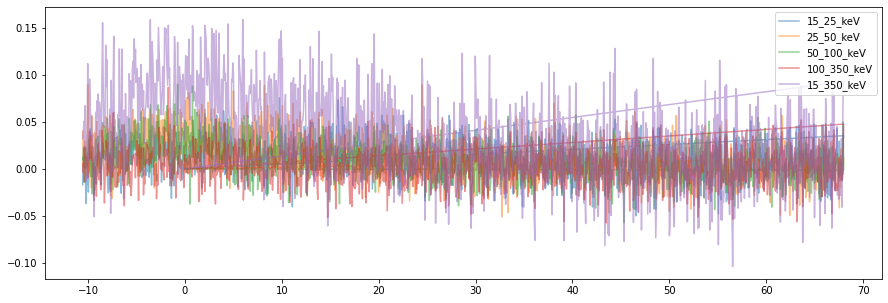

In [6]:
plt.figure(figsize = (15,5))
for i in df.columns[1:]:
    plt.plot(df.center, df[i], label = i, alpha=0.5)
plt.legend()
plt.show()

In [2]:
burst_names = [i for i in os.listdir('../data/raw_data') if 'fth' in i]

In [8]:
len_burst = []
nas = []
for name in tqdm(burst_names):
    df = pd.read_feather(f'../data/raw_data/{name}')
    na = df.isna().sum()
    l = len(df)

    len_burst.append(l)
    nas.append(na)

  0%|          | 0/1349 [00:00<?, ?it/s]

In [9]:
max_len = max(len_burst)
max_len

15308

In [ ]:
for name in tqdm(burst_names):
    df = pd.read_feather(f'../data/raw_data/{name}')
    nzeros = max_len - len(df)
    if nzeros != 0:
        zeros = np.zeros((nzeros,6))
        zeros = pd.DataFrame(zeros)
        zeros.columns = df.columns
        df = pd.concat([df, zeros]).reset_index(drop=True)
        print(df)
        df.to_feather(f'../data/raw_data/{name}')

### Normalization 

In [3]:
import numpy as np
from numpy import trapz

data = []

for name in tqdm(burst_names):
    df = pd.read_feather(f'../data/raw_data/{name}')

    y = df['15_25_keV']
    area = trapz(y)
    y0 = y/area
    #df['15_25_keV_norm'] = y

    y = df['25_50_keV']
    area = trapz(y)
    y1 = y/area
    #df['25_50_keV_norm'] = y

    y = df['50_100_keV']
    area = trapz(y)
    y2 = y/area
    #df['50_100_keV_norm'] = y

    y = df['100_350_keV']
    area = trapz(y)
    y3 = y/area
    #df['100_350_keV_norm'] = y

    y = list(y0) + list(y1) + list(y2) + list(y3)

    data.append(y)

  0%|          | 0/1349 [00:00<?, ?it/s]

In [4]:
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,61222,61223,61224,61225,61226,61227,61228,61229,61230,61231
0,0.010206,0.006273,0.011876,0.015050,0.000933,0.009561,0.005198,0.010377,0.003148,0.009091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006840,0.001779,-0.004907,0.008985,0.007562,0.003292,0.003356,0.001566,0.005934,0.005914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011258,0.022050,0.005984,0.018396,0.024569,0.013281,0.025262,0.023485,0.021683,0.014142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000830,0.000469,-0.000101,0.000535,0.000093,-0.000724,-0.000342,0.000491,-0.000133,-0.000807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000608,-0.000111,0.001385,-0.000130,0.000406,0.000809,-0.000890,0.000336,0.000504,-0.000741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,-0.019183,0.007751,0.020335,0.002918,0.001728,0.021368,0.008135,-0.005849,0.000407,0.020443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.000370,0.000932,0.000804,0.000477,0.001063,0.001244,0.000870,0.000357,0.000276,0.000267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346,-0.004858,0.054161,0.097586,0.025343,0.036857,0.057192,0.069243,0.007760,-0.029689,0.017623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1347,0.003446,0.006810,0.006169,-0.000789,-0.002712,0.006014,-0.004663,0.009708,0.001674,0.004250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


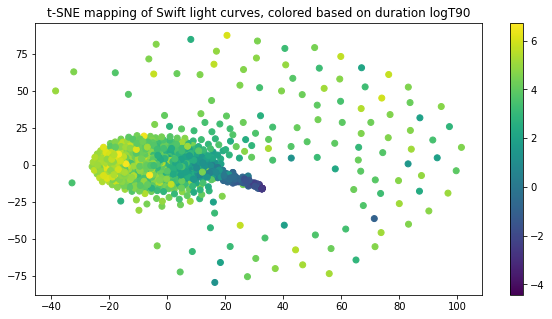

In [92]:
# tsne
tsne = TSNE(perplexity = 30, random_state = 42)
X = tsne.fit_transform(data.fillna(0))
X = pd.DataFrame(X)
X['name'] = [ x.split('.')[0] for x in  burst_names]
X = X.merge(t90_duration[['index', 'duration']], left_on='name', right_on='index')
X['duration_log'] = np.log(X['duration'])
plt.figure(figsize=(10,5))
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
plt.colorbar()
plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
plt.show()

### Discrete-time Fourier transform

In [5]:
from scipy.fft import  rfft, fftfreq

In [9]:
a = rfft(data)
a = pd.DataFrame(a)

In [10]:
a = a.applymap(lambda x: abs(x))
a = a.fillna(0)

## t-SNE 

In [11]:
from sklearn.manifold import TSNE
t90_duration = pd.read_csv('t90_duration.csv')

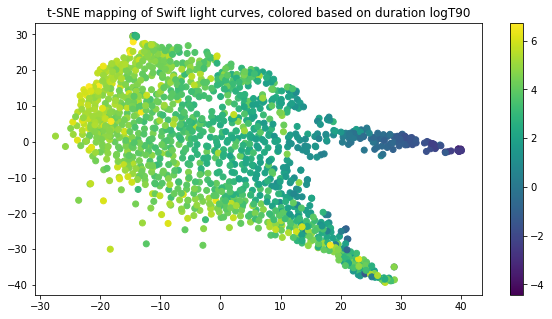

In [12]:
tsne = TSNE(perplexity = 30, random_state = 42)
X = tsne.fit_transform(a)
X = pd.DataFrame(X)
X['name'] = [ x.split('.')[0] for x in  burst_names]
X = X.merge(t90_duration[['index', 'duration']], left_on='name', right_on='index')
X['duration_log'] = np.log(X['duration'])
plt.figure(figsize=(10,5))
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
plt.colorbar()
plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
plt.show()

In [16]:
X.columns = ['x', 'y', 'name', 'index', 'T90', 'duration_log']

In [18]:
X[['name', 'x', 'y',  'T90']].to_csv('GRB_tsne.csv', index = False)

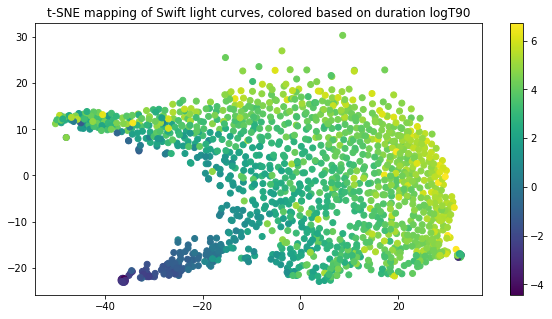

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
plt.colorbar()
plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
plt.show()

perplexity: 15


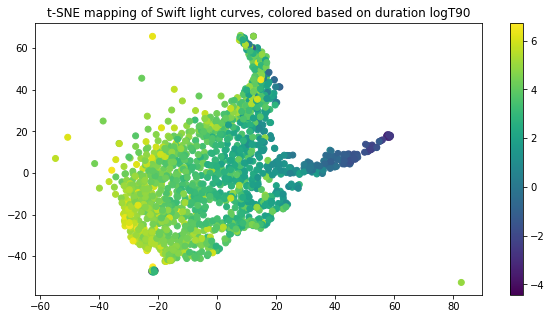

perplexity: 30


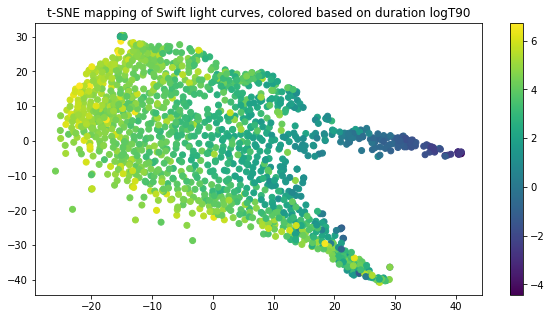

perplexity: 45


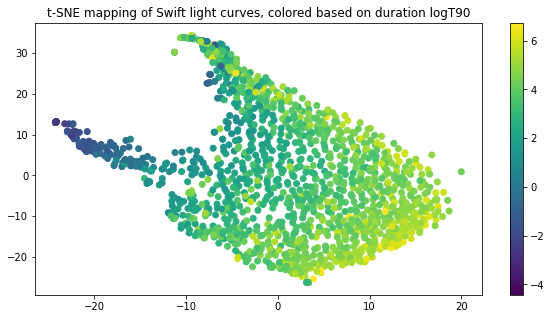

perplexity: 64


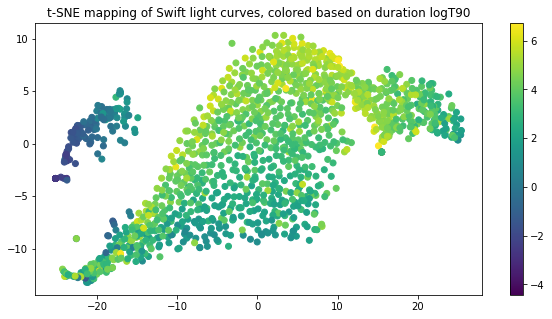

perplexity: 128


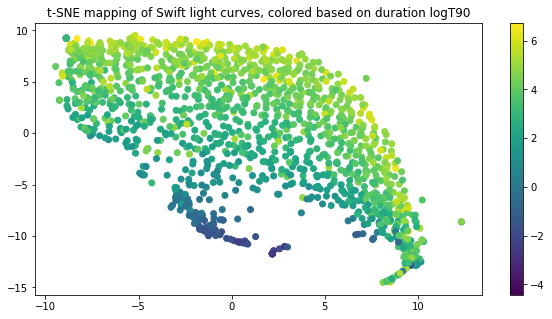

In [88]:
for i in [15,30,45,64,128]:
    print(f'perplexity: {i}')
    tsne = TSNE(perplexity = i)
    X = tsne.fit_transform(a)
    X = pd.DataFrame(X)
    X['name'] = [ x.split('.')[0] for x in  burst_names]
    X = X.merge(t90_duration[['index', 'duration']], left_on='name', right_on='index')
    X['duration_log'] = np.log(X['duration'])
    plt.figure(figsize=(10,5))
    plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
    plt.colorbar()
    plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
    plt.show()

perplexity: 10


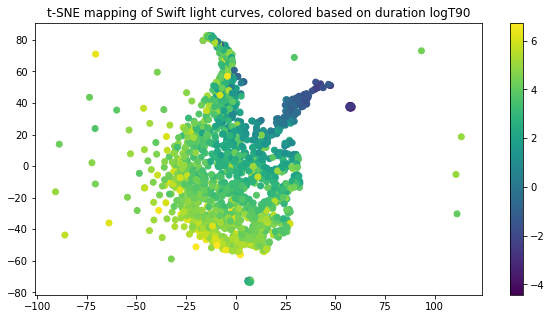

perplexity: 20


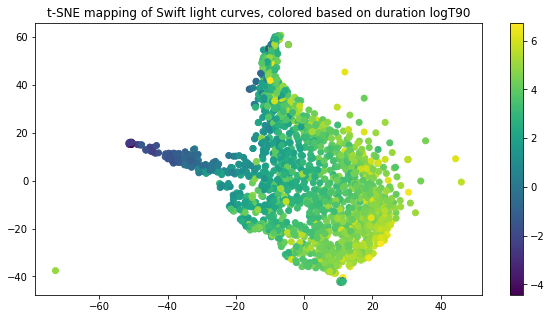

perplexity: 30


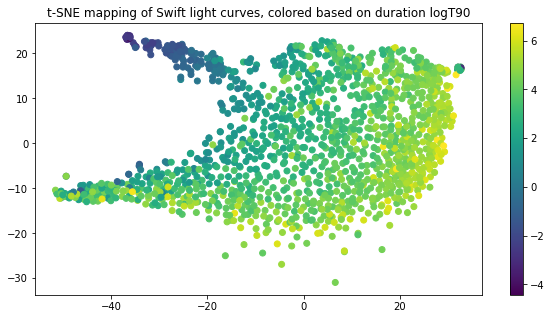

perplexity: 40


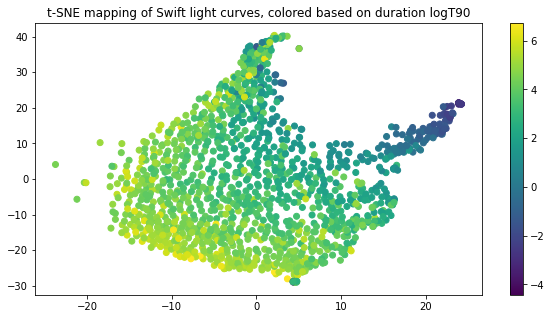

perplexity: 50


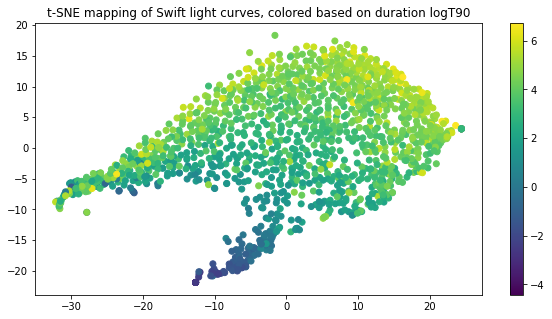

In [90]:
for i in [10,20,30,40,50]:
    print(f'perplexity: {i}')
    tsne = TSNE(perplexity = i)
    X = tsne.fit_transform(a)
    X = pd.DataFrame(X)
    X['name'] = [ x.split('.')[0] for x in  burst_names]
    X = X.merge(t90_duration[['index', 'duration']], left_on='name', right_on='index')
    X['duration_log'] = np.log(X['duration'])
    plt.figure(figsize=(10,5))
    plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
    plt.colorbar()
    plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
    plt.show()

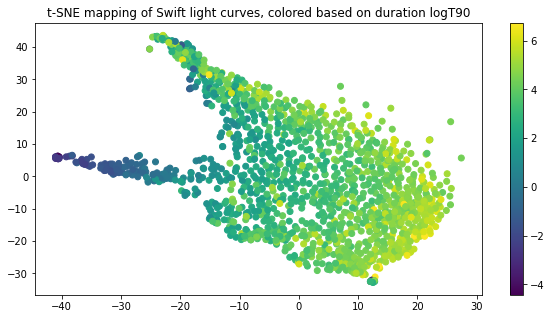

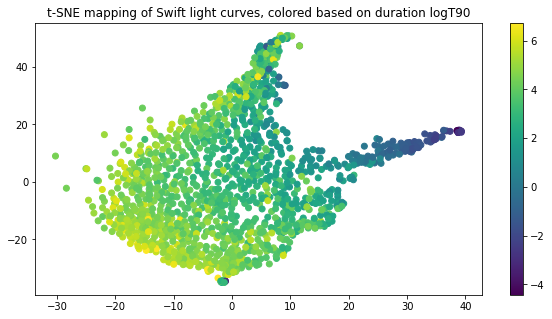

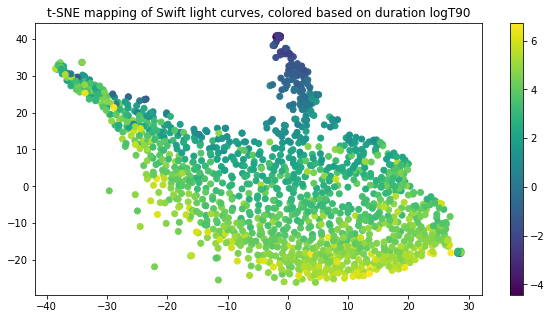

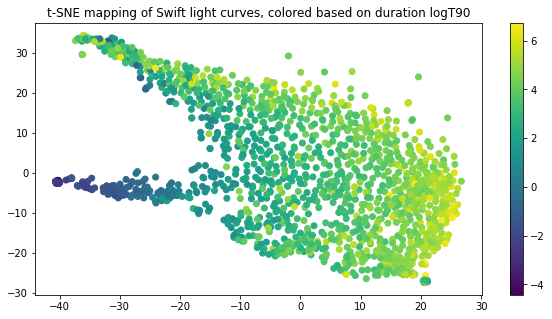

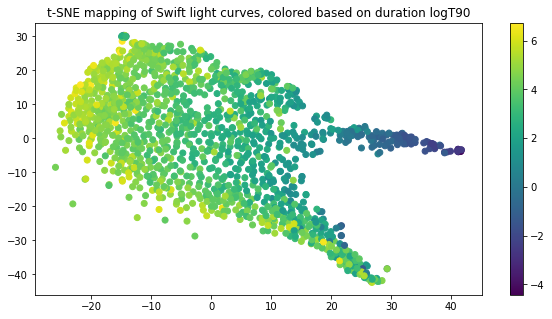

In [93]:
for _ in range(5):
    tsne = TSNE(perplexity = 30)
    X = tsne.fit_transform(a)
    X = pd.DataFrame(X)
    X['name'] = [ x.split('.')[0] for x in  burst_names]
    X = X.merge(t90_duration[['index', 'duration']], left_on='name', right_on='index')
    X['duration_log'] = np.log(X['duration'])
    plt.figure(figsize=(10,5))
    plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = X['duration_log'])
    plt.colorbar()
    plt.title('t-SNE mapping of Swift light curves, colored based on duration logT90')
    plt.show()